In [78]:
import pandas as pd

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import pyfolio as pf
import requests 
import csv as csv



url = 'https://hubeau.eaufrance.fr/api/v1/hydrometrie/observations_tr.csv?distance=60&grandeur_hydro=Q&latitude=43.64&longitude=0.42&size=20000&sort=desc'
df = pd.read_csv(url, sep=';', header=0, decimal=',')
#df=pd.DataFrame(index = range(1,100),columns=['code_site','code_station', 'date_obs','resultat_obs'])




In [79]:


# Transformer la colonne A en format de date
df['date_obs'] = pd.to_datetime(df['date_obs'])

# Transformer la colonne B en nombre
df['resultat_obs'] = pd.to_numeric(df['resultat_obs'])




df.head(5)

df.index = df['date_obs']
#df.sort_values(by = ['code_station'], ascending = True)


In [80]:
df2=df[['code_station', 'date_obs', 'resultat_obs']]


df2['count']= 0
resultat = df2['code_station'].value_counts()


df2.drop_duplicates(subset=['code_station'], keep='first', inplace=True)

df2['nom station'] =0




C:\Users\andyb\AppData\Local\Temp\ipykernel_3216\814821842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['count']= 0
C:\Users\andyb\AppData\Local\Temp\ipykernel_3216\814821842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=['code_station'], keep='first', inplace=True)
C:\Users\andyb\AppData\Local\Temp\ipykernel_3216\814821842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [81]:
resultat = df2['code_station'].value_counts()


In [82]:

df33 = pd.read_csv('liste stations2.csv')#, sep=';', header=0, decimal='.')


df007= df33[['code_station', 'nom_station']]
df007
df007.index=df007['code_station']
df007

,code_station,nom_station
code_station,,
O243402001,O243402001,Boulogne
O245291001,O245291001,Isle en Dodon
O246293001,O246293001,Lombez
O252291001,O252291001,Isle Jourdain
O273501001,O273501001,Tirent Pontejac
O274331001,O274331001,Gimont
O605401001,O605401001,Aubiet
O606401001,O606401001,Mauvezin
O622251001,O622251001,Masseube


In [83]:
df33['seuil jaune bas'] = pd.to_numeric(df33['seuil jaune bas'])
df33['seuil orange bas'] = pd.to_numeric(df33['seuil orange bas'])
df33['seuil jaune haut'] = pd.to_numeric(df33['seuil jaune haut'])
df33['seuil orange haut'] = pd.to_numeric(df33['seuil orange haut'])
df33['seuil rouge bas'] = pd.to_numeric(df33['seuil rouge bas'])

In [84]:
df99= pd.merge(df33,df2)
df99.drop(columns = ['count', 'nom station'], inplace = True)



In [85]:
df100 = df99.copy()
df100.index = df100.code_station
df100['debit(m3/s)']=0
df100['max probable'] =0
df100['max de max probable'] =0
df100['previ deb'] = 0
df100['previ orange'] =0
#df100['resultat_obs'] = pd.to_numeric(df['resultat_obs'])
df100['debit(m3/s)'] = df100['resultat_obs']/1000
df100['nom station'] = 'toto'
df100['nom station'] = df100['nom_station'] 

df100['marge 1er debord']=0
df100['marge seuil orange']=0




df100


,code_station,nom_station,cours d’eau,seuil jaune bas,seuil jaune haut,seuil orange bas,seuil orange haut,seuil rouge bas,date_obs,resultat_obs,debit(m3/s),max probable,max de max probable,previ deb,previ orange,nom station,marge 1er debord,marge seuil orange
code_station,,,,,,,,,,,,,,,,,,
O243402001,O243402001,Boulogne,Gesse,NaN,NaN,NaN,NaN,NaN,2023-05-14 13:15:00+00:00,2290.0,2.29,0,0,0,0,Boulogne,0,0
O274331001,O274331001,Gimont,Gimone,2.80,3.0,4.40,4.6,6.2,2023-05-14 13:15:00+00:00,3400.0,3.40,0,0,0,0,Gimont,0,0
O622251001,O622251001,Masseube,Gers,3.00,3.5,4.00,4.5,6.0,2023-05-14 13:15:00+00:00,13900.0,13.90,0,0,0,0,Masseube,0,0
O625401001,O625401001,St Jean Le Comtal,Sousson,NaN,NaN,NaN,NaN,NaN,2023-05-14 13:15:00+00:00,5390.0,5.39,0,0,0,0,St Jean Le Comtal,0,0
O623501001,O623501001,Orbessan,Gers,NaN,NaN,NaN,NaN,NaN,2023-05-14 13:15:00+00:00,15600.0,15.60,0,0,0,0,Orbessan,0,0
O630252001,O630252001,Auch,Gers,1.20,1.4,4.00,4.3,6.5,2023-05-14 13:15:00+00:00,28800.0,28.80,0,0,0,0,Auch,0,0
O631000101,O631000101,Montestruc,Gers,NaN,NaN,NaN,NaN,NaN,2023-05-14 11:00:00+00:00,21600.0,21.60,0,0,0,0,Montestruc,0,0
O633251101,O633251101,Fleurance,Gers,NaN,NaN,NaN,NaN,NaN,2023-05-14 13:00:00+00:00,21400.0,21.40,0,0,0,0,Fleurance,0,0
O633251001,O633251001,Lectoure,Gers,2.40,2.5,3.55,3.6,4.0,2023-05-14 13:15:00+00:00,13200.0,13.20,0,0,0,0,Lectoure,0,0


In [86]:
df_deb=df100[df100['marge 1er debord']<0]
df_or = df100[df100['marge seuil orange']<0]
df_prevideb =df100[df100['previ deb']<0]
df_previorange = df100[df100['previ orange']<0]
df_deb

# liste des stations ayant franchi le seuil de premier débordement ( seuil jaune bas = transition vert jaune) :

,code_station,nom_station,cours d’eau,seuil jaune bas,seuil jaune haut,seuil orange bas,seuil orange haut,seuil rouge bas,date_obs,resultat_obs,debit(m3/s),max probable,max de max probable,previ deb,previ orange,nom station,marge 1er debord,marge seuil orange
code_station,,,,,,,,,,,,,,,,,,


C:\Users\andyb\AppData\Local\Temp\ipykernel_3216\3210380273.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df100['nom_station'], rotation=90)


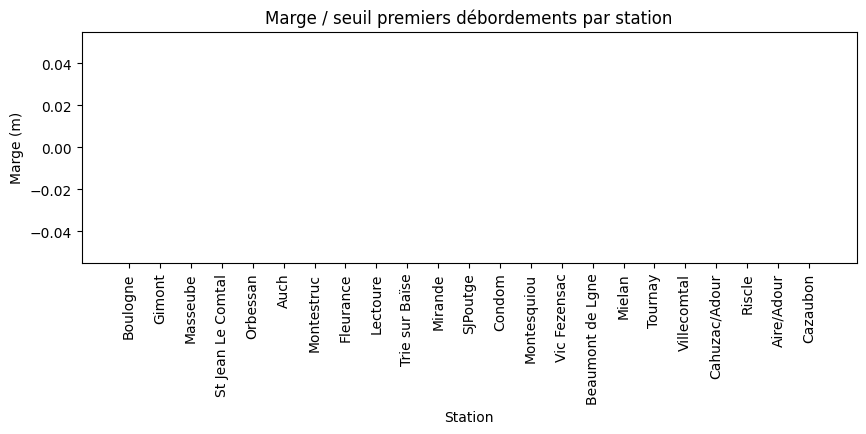

C:\Users\andyb\AppData\Local\Temp\ipykernel_3216\3210380273.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df100['nom_station'], rotation=90)


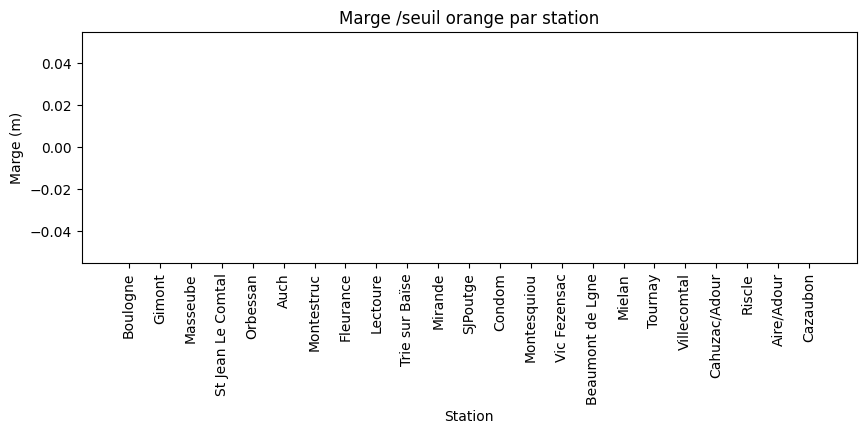

In [87]:
import pandas as pd
import matplotlib.pyplot as plt



# Créer un objet figure et axes pour tracer l'histogramme
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 3))

# Tracer l'histogramme
ax.bar(df100['nom_station'], df100['marge 1er debord'],color='blue')

# Fixer les noms de stations sur l'axe x et les écrire verticalement
#ax.set_xticks(df.index)
ax.set_xticklabels(df100['nom_station'], rotation=90)

# Ajouter un titre et des étiquettes d'axe
ax.set_title('Marge / seuil premiers débordements par station')
ax.set_xlabel('Station')
ax.set_ylabel('Marge (m)')


# Afficher l'histogramme
plt.show()

import pandas as pd
import matplotlib.pyplot as plt



# Créer un objet figure et axes pour tracer l'histogramme
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 3))

# Tracer l'histogramme
ax.bar(df100['nom_station'], df100['marge seuil orange'], color='red')

# Fixer les noms de stations sur l'axe x et les écrire verticalement
#ax.set_xticks(df.index)
ax.set_xticklabels(df100['nom_station'], rotation=90)

# Ajouter un titre et des étiquettes d'axe
ax.set_title('Marge /seuil orange par station')
ax.set_xlabel('Station')
ax.set_ylabel('Marge (m)')


# Afficher l'histogramme
plt.show()

C:\Users\andyb\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


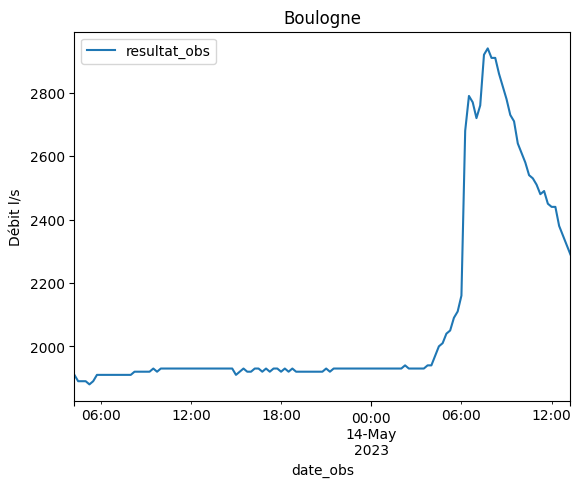

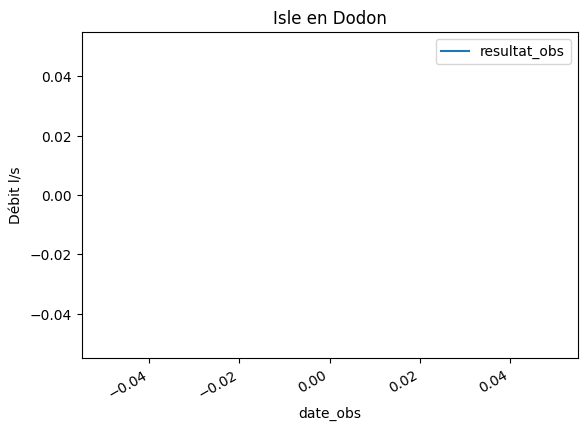

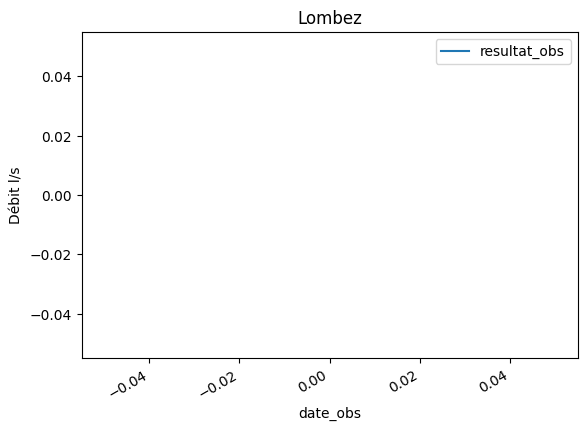

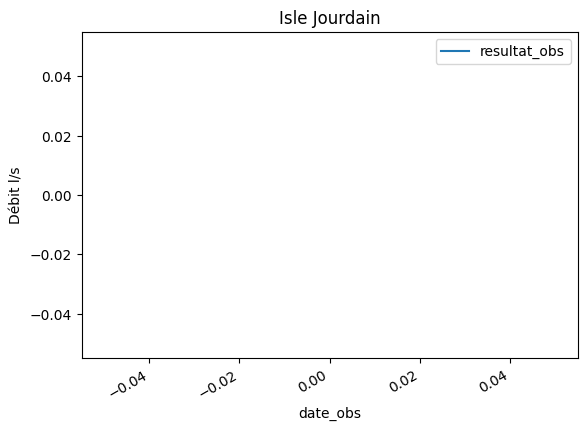

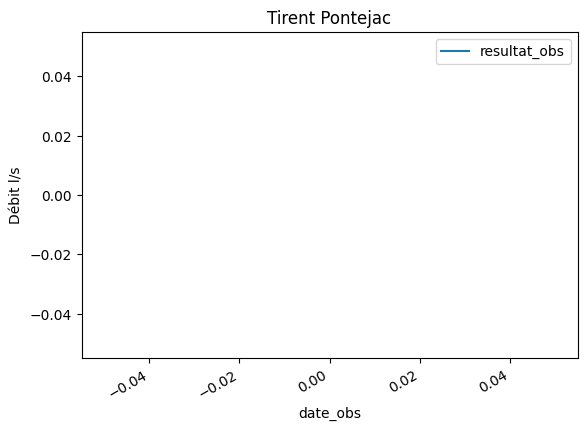

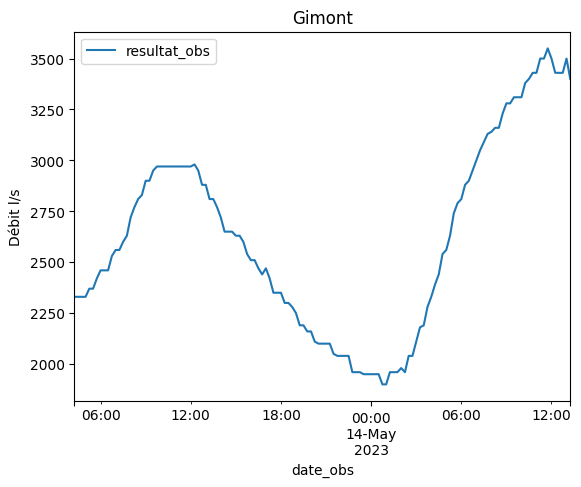

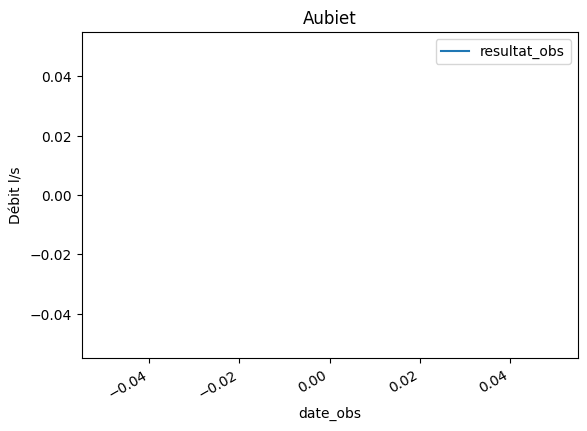

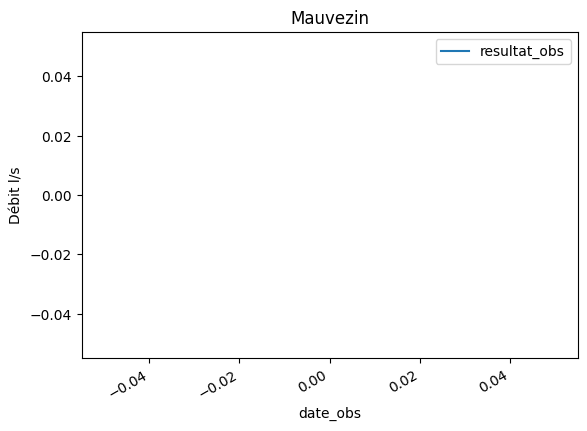

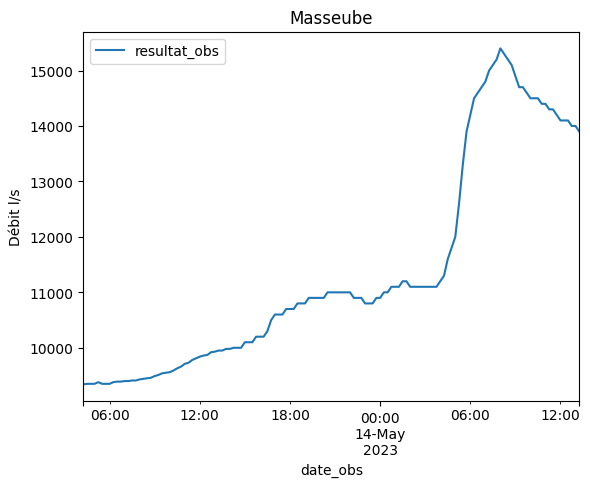

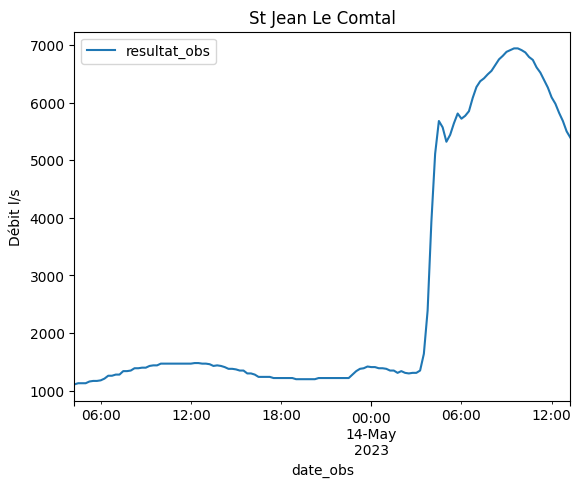

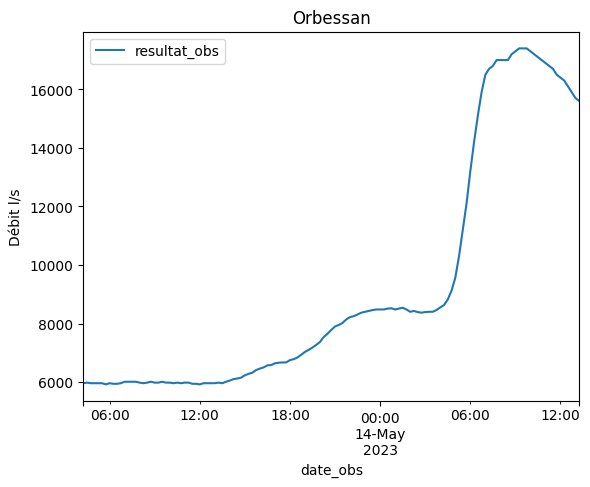

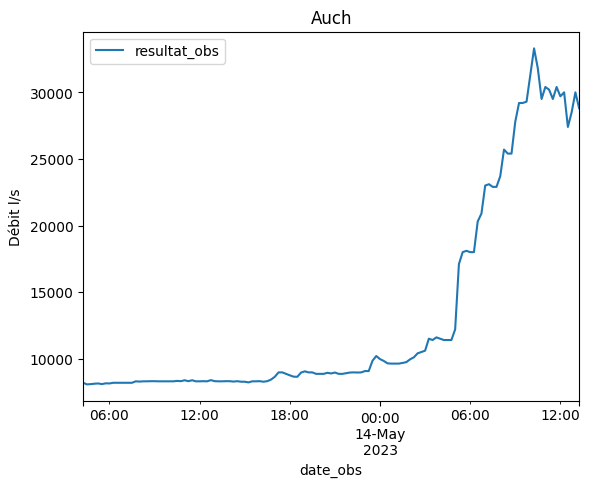

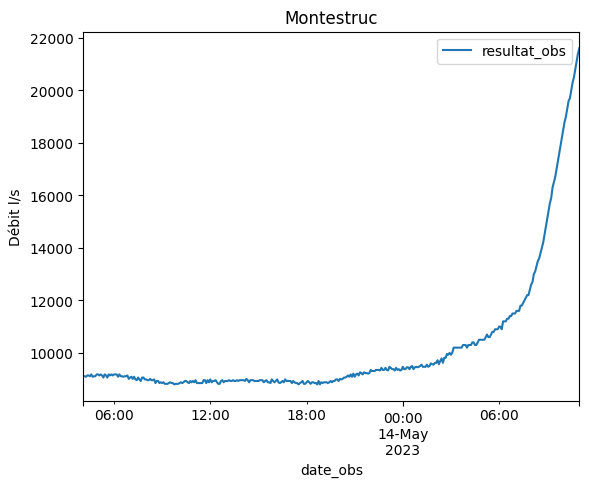

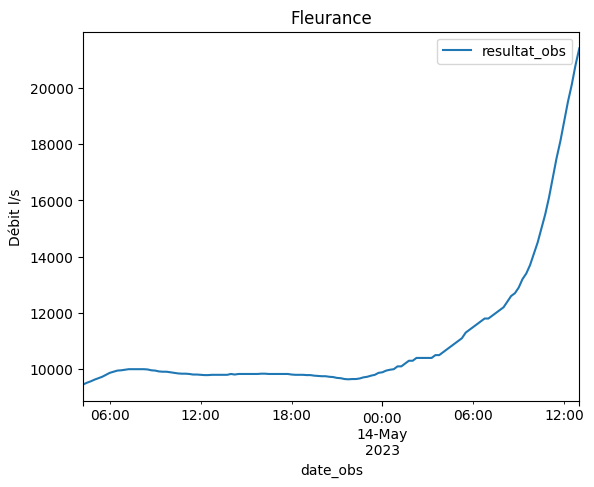

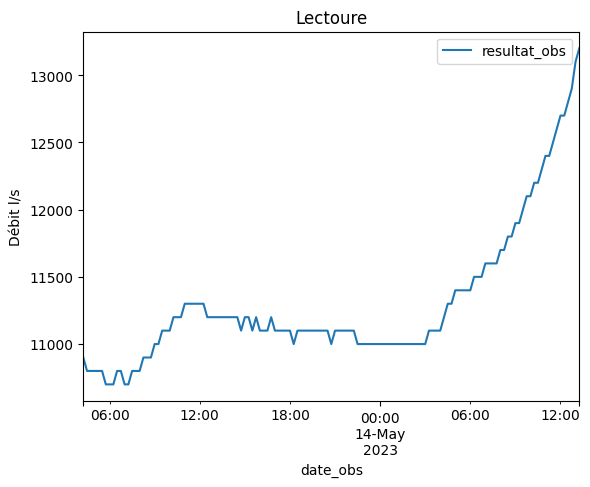

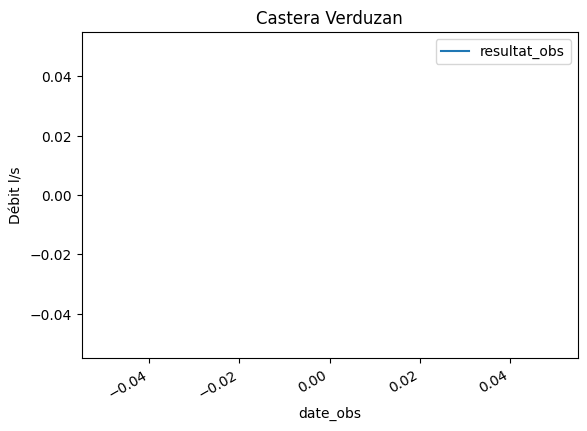

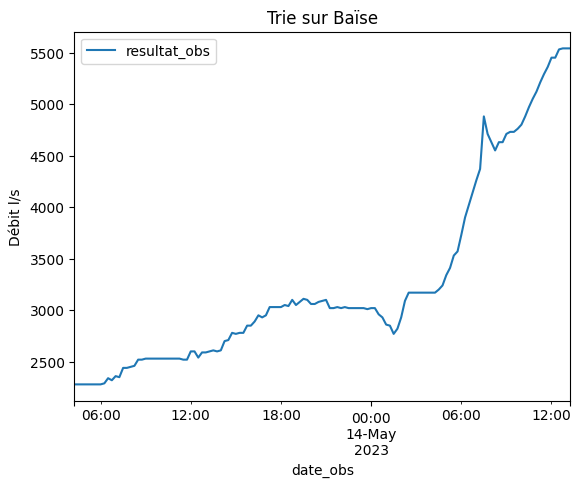

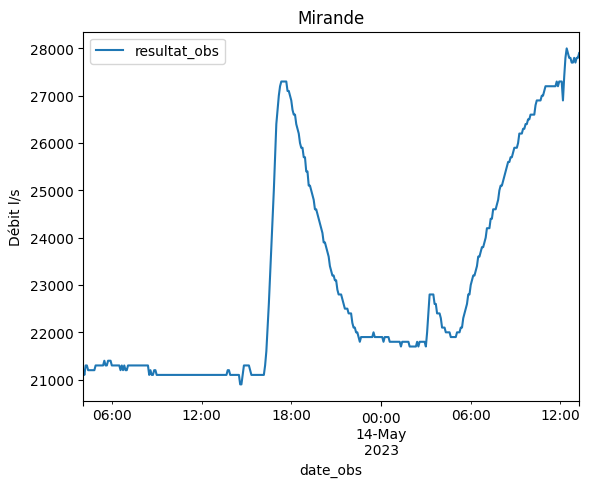

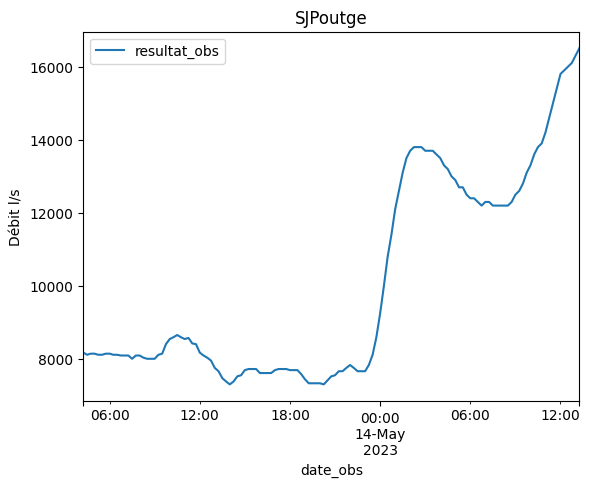

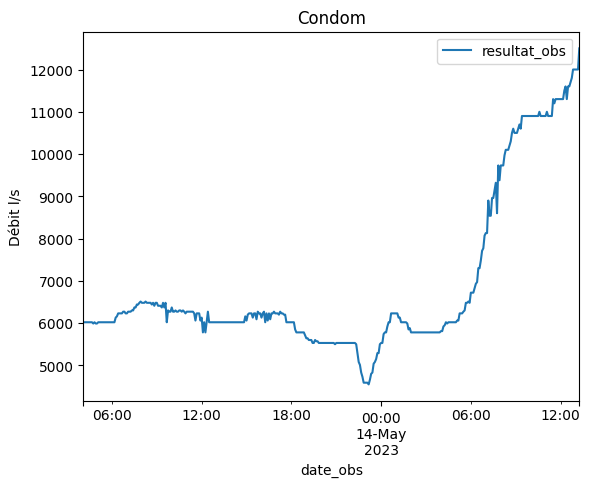

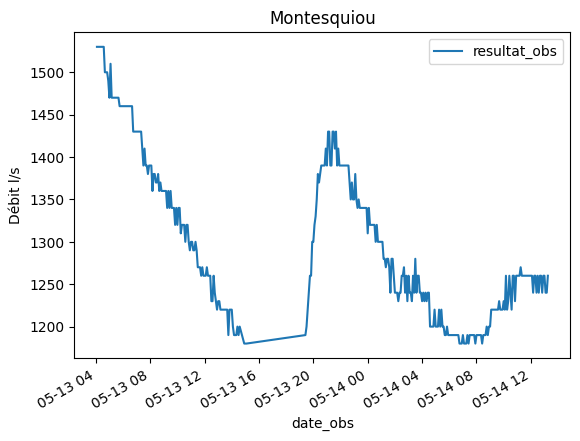

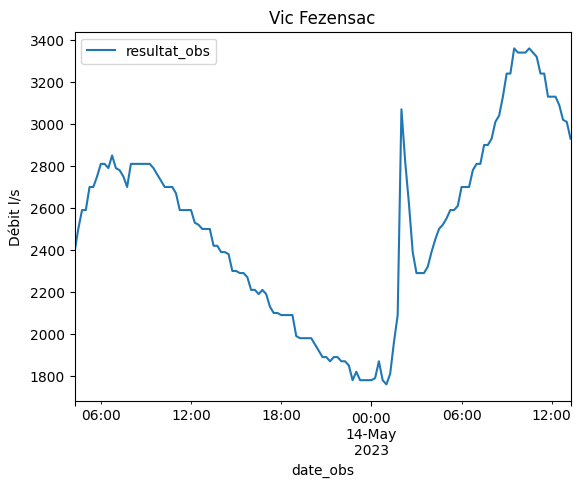

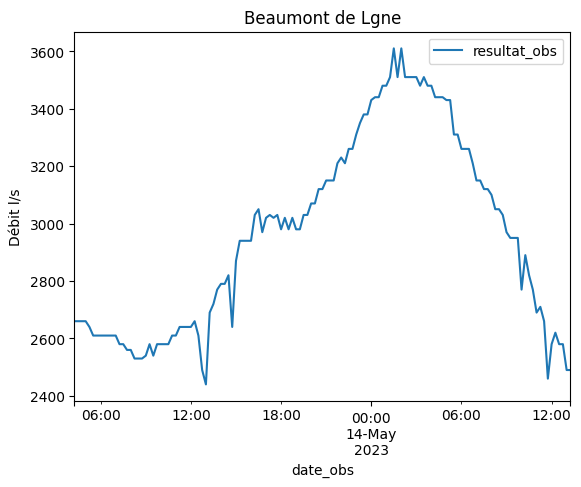

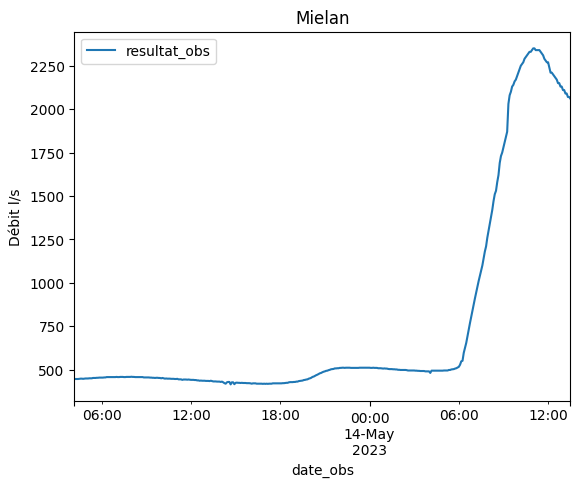

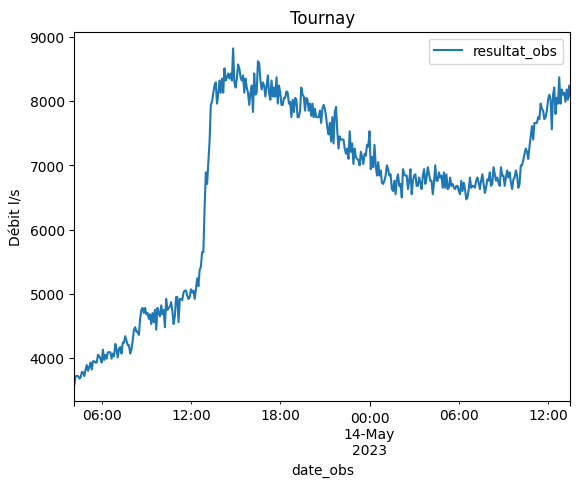

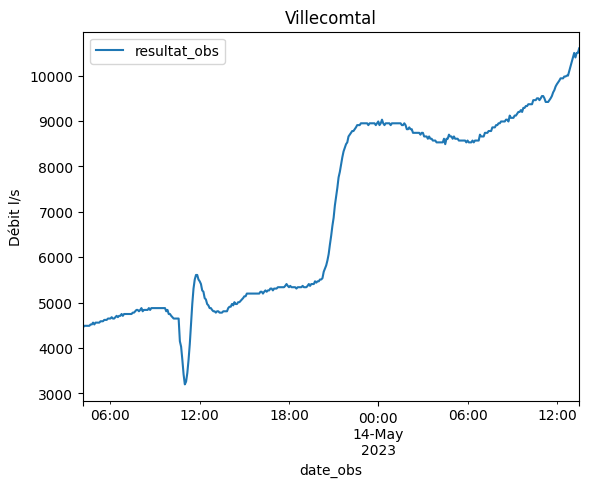

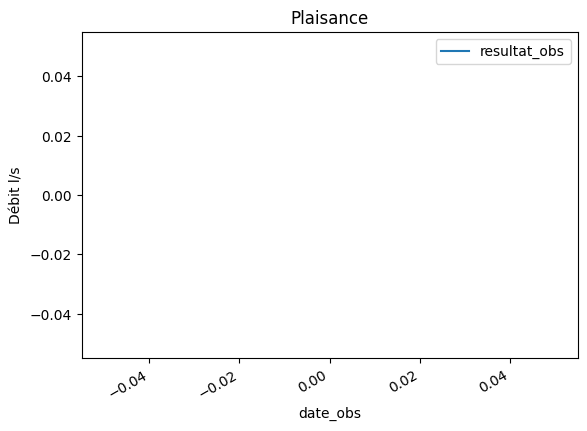

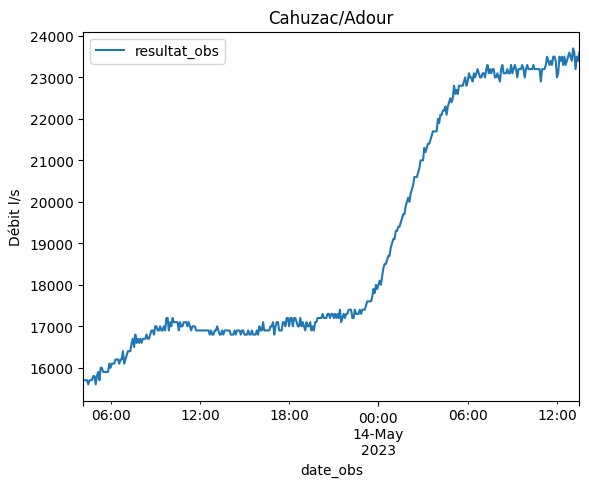

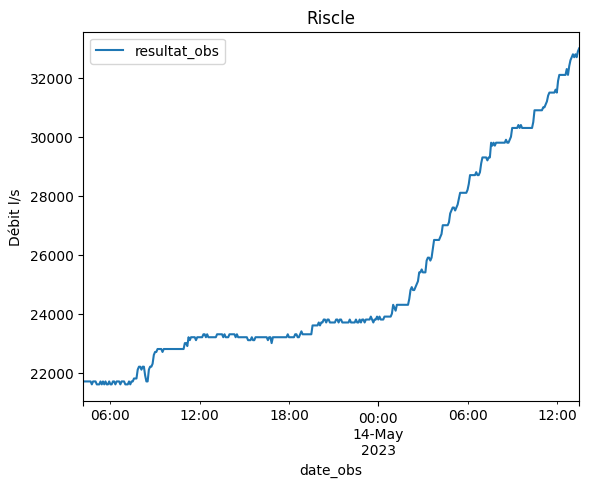

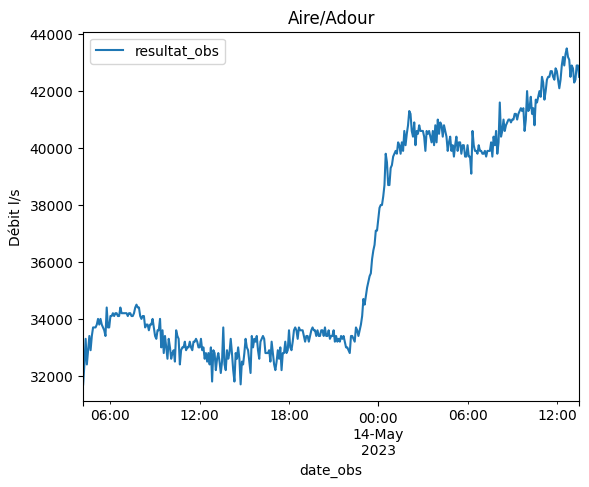

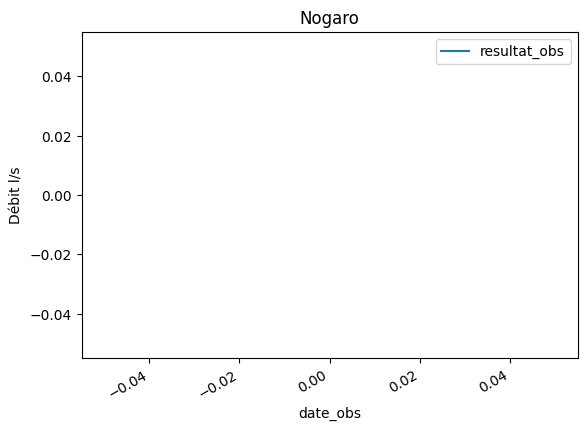

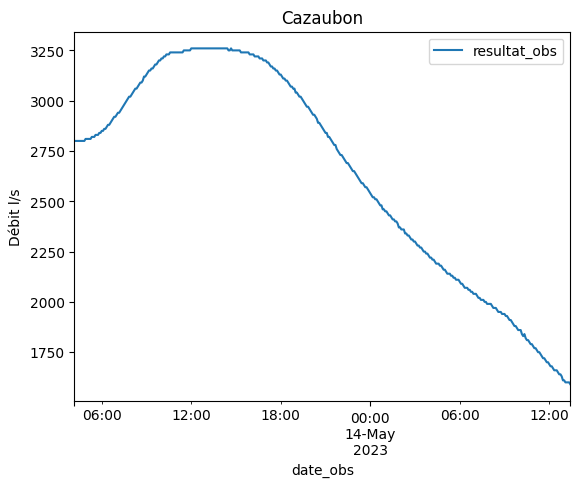

In [88]:
for code_station in list (df007.index) :

       
      df25 = df.copy()
      df25=df25[['code_station','resultat_obs']]
      nom=df007.loc[code_station,'nom_station']
      df25.rename(columns = {'resultat_obs': nom})
      
      df25 = df25.sort_values(by = ['date_obs'], ascending = True)
      
      df25= df25[df25['code_station']==code_station]
      
      df25.plot()
      
      plt.title(nom)
      plt.ylabel('Débit l/s')

      
      
      
   